In [40]:
%matplotlib inline

import pylab as plt
import numpy as np

from tensorflow.python.ops.histogram_ops import histogram_fixed_width,histogram_fixed_width_bins
from tensorflow.python.ops.random_ops import random_uniform as uniform

from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

In [30]:
# histogram_fixed_width?

In [55]:
y_dmd = np.linspace(-1,1,20)
y_dmd = np.exp(-1*(y_dmd**2))
y_dmd = y_dmd-y_dmd.min()
y_dmd = 1000*y_dmd/y_dmd.sum()

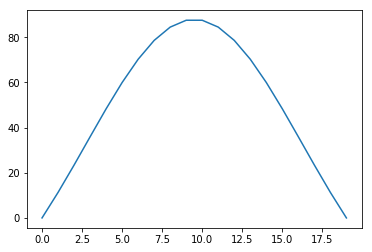

In [56]:
plt.plot(y_dmd)

In [72]:
x_in = Input(shape=(1000))

x = Dense(100)(x_in)
x = Dense(1000)(x)


# hist = histogram_fixed_width(x,
#                              [0,1],
#                              nbins=20)
# hist = cast_to_floatx(hist)

hist = K.sum(x,axis=-1)
hist = cast_to_floatx(hist)

model = Model(inputs=x_in,outputs=hist)
model.compile(loss=mse)

In [73]:
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 1000)]            0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              101000    
_________________________________________________________________
tf_op_layer_Sum_1 (TensorFlo [(None,)]                 0         
Total params: 201,100
Trainable params: 201,100
Non-trainable params: 0
_________________________________________________________________


In [74]:
x_train = uniform((2000,1000),
            minval=0,
            maxval=1)
y_train = 2000*[y_dmd]
y_train = 2000*[2]
y_train = np.array(y_train)
y_train.shape

(2000,)

In [76]:
model.fit(x_train,y_train,epochs=50,batch_size=100)

Train on 2000 samples
Epoch 1/50
2000/2000 [==============================] - 0s 110us/sample - loss: 4.9391
Epoch 2/50
2000/2000 [==============================] - 0s 44us/sample - loss: 0.4687
Epoch 3/50
2000/2000 [==============================] - 0s 45us/sample - loss: 0.9421
Epoch 4/50
2000/2000 [==============================] - 0s 47us/sample - loss: 29042.1765
Epoch 5/50
2000/2000 [==============================] - 0s 44us/sample - loss: 1065.5450
Epoch 6/50
2000/2000 [==============================] - 0s 51us/sample - loss: 664.9516
Epoch 7/50
2000/2000 [==============================] - 0s 64us/sample - loss: 277.3488
Epoch 8/50
2000/2000 [==============================] - 0s 54us/sample - loss: 203.7635
Epoch 9/50
2000/2000 [==============================] - 0s 47us/sample - loss: 6.3150
Epoch 10/50
2000/2000 [==============================] - 0s 50us/sample - loss: 1.0667
Epoch 11/50
2000/2000 [==============================] - 0s 58us/sample - loss: 39292.7696
Epoch 12/50


In [48]:
from tensorflow.keras.backend import cast_to_floatx
from tensorflow.keras import backend as K
K.floatx()

'float32'

In [47]:
cast_to_floatx?

In [23]:
# histogram_fixed_width?

In [24]:
xp = x.numpy()
xp.min(),xp.max()

(1.7762184e-05, 0.99997973)

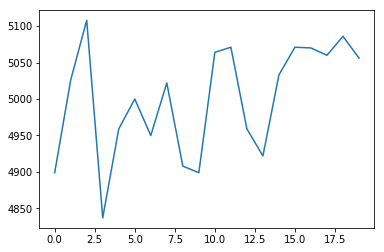

In [28]:
plt.plot(hist.numpy())